# **CIS 591 Team Assignment 2**
## **Team 4 - PyMasters**
*Gaganjot Kaur Sohi, Ayush Kaurav, Ritika Anand, Daniel Farr*



## Description of each team member's work & percentage of contribution

Gaganjot: Analyzed how often the funding was allocated in a year (25%)
<br>
Ayush: Analyzed program efficiency (25%)
<br>
Ritika: Analyzed correlation of spending versus allocation (25%)
<br>
Daniel: Analyzed how was spent versus allocated for each program type (25%)

# **What is the ARPA Fund Allocation?**
The American Rescue Plan Act (ARPA) provided $350 billion in relief to state, local, and Tribal governments to address the impact of the COVID-19 pandemic.



#**What is the Aim of This Analysis?**
The aim of this project is to understand funding allocation of ARPA through looking at 4 main questions:
1. How often was the funding allocated in a year?
2. Program Efficiency: Evaluating the effectiveness of programs in utilizing their allocated budgets
3. How much money was allocated and spent by each program type?
5. What is the Pearson correlation coefficient in relation to allocation of funds to spending? Does higher allocation correlate to higher spending?


## **How often was the funding allocated in a year?**

### Pseudocode:
a. Group data as by extracting the Year from the “Date Allocated” column to extract the funds allocated in a year.

b. Use the “for-else” loop to count the number of allocations made in a year, and visually represent it in a bar graph.



In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
pd.options.display.float_format = '{:.2f}'.format
import os
from google.colab import drive
drive.mount('/content/drive')
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

Mounted at /content/drive


In [2]:
# Load the dataset into a pandas DataFrame
df = pd.read_csv("/content/drive/MyDrive/arpa.csv")

In [3]:
# Step 3: Extract the "Date Allocated" column
date_allocated = df['Date Allocated']

In [4]:
# Step 4: Convert the "Date Allocated" to datetime format and extract the year
df['Year Allocated'] = pd.to_datetime(date_allocated).dt.year

In [5]:
# Step 5: Initialize an empty dictionary to store allocations per year
allocation_count = {}

In [6]:
# Step 6: Count the number of allocations per year
for year in df['Year Allocated']:
    if year in allocation_count:
        allocation_count[year] += 1
    else:
        allocation_count[year] = 1
print(allocation_count)

{2021: 92, 2022: 36, 2023: 10, 2024: 6}


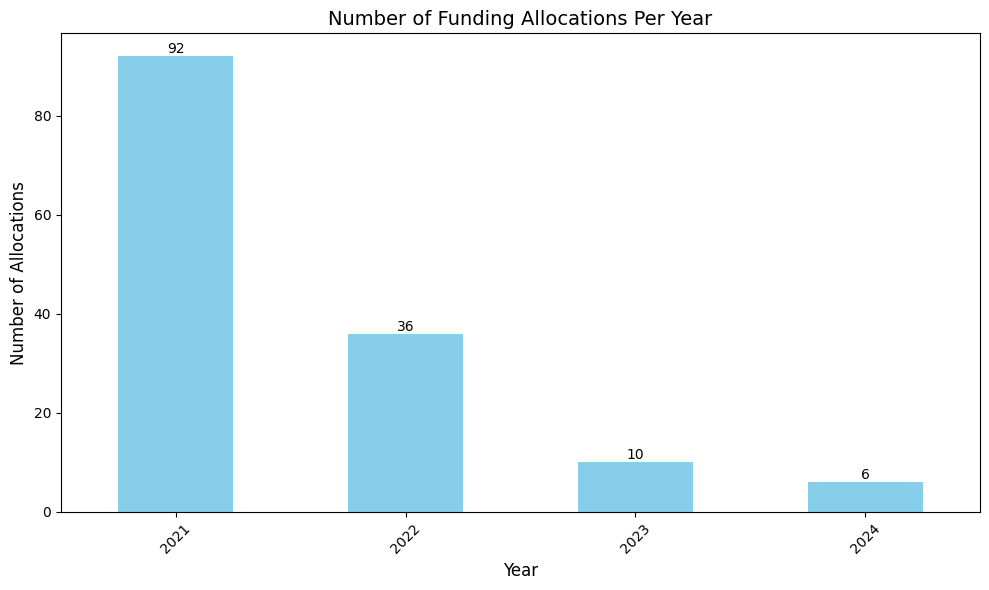

In [7]:
import matplotlib.pyplot as plt
import pandas as pd

plt.figure(figsize=(10, 6))

# Convert the allocation_count dictionary to a Pandas Series
allocation_series = pd.Series(allocation_count)

allocation_series.plot(kind='bar', color='skyblue')

# Adding title and labels
plt.title('Number of Funding Allocations Per Year', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Allocations', fontsize=12)

# Display the plot
plt.xticks(rotation=45)
plt.tight_layout()

# Add labels on the bars
for i, v in enumerate(allocation_series):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.show()

## ***Observations:***

Looking at the number of funds allocated in a year helps understand the demand for financial assistance to support the recovery efforts from Covid-19 in the city of Phoenix. We see the year wise funding provided since the strike of the pandemic.
1. In 2021, there are 92 times a year when funds were allocated to support COVID-19 recovery.
2. Over the next 4 years, there is a significant decrease in the demand, and by 2024 there was only 6 times in the year that the funds were allocated.  

## **How much money was allocated and spent by each program type?**

 ## Pseudocode
 1. Import csv and create a Pandas dataframe.
 2. Calculate the difference between total amount allocated and amount spent to find amount of funds remaining.
 3. Use dataframe to group by 'Program Type'and 'Amount Type', then sum by these groupings. Print results.
 4.  Create a pie chart that compares the amount allocated by program type. Create another pie chart that does the same amount spent.
 5. Create bar chart that visualizes how much of the funds allocated each program type either has remaining or has gone over by.

In [8]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
pd.options.display.float_format = '{:.2f}'.format

In [9]:
#df = pd.read_csv("arpa.csv")

In [10]:
df.head()

,_id,Investment Focus,Program Type,Program,Amount,Amount Type,Date Allocated,As of Date,Year Allocated
0,1,City Operations,City Operations,"Administrative Oversight, Compliance & Outreac...",2485984.00,Budgeted Amount,2021-06-08T00:00:00,2024-08-31T00:00:00,2021
1,2,City Operations,City Operations,"Administrative Oversight, Compliance & Outreac...",1779217.92,Actual Spend Amount,2021-06-08T00:00:00,2024-08-31T00:00:00,2021
2,3,Community Investment,Affordable Housing and Homelessness,Affordable Housing Program,16000000.00,Budgeted Amount,2022-06-07T00:00:00,2024-08-31T00:00:00,2022
3,4,Community Investment,Affordable Housing and Homelessness,Affordable Housing Program,1812798.50,Actual Spend Amount,2022-06-07T00:00:00,2024-08-31T00:00:00,2022
4,5,Community Investment,Neighborhood Sustainability,After-School Grant for Phoenix Schools,601463.36,Actual Spend Amount,2021-06-08T00:00:00,2024-08-31T00:00:00,2021


In [11]:
# Calculate the total budgeted amount (allocated amount) and the actual spend amount (spent amount)

total_budgeted = df[df['Amount Type'] == 'Budgeted Amount']['Amount'].sum()

total_actual_spend = df[df['Amount Type'] == 'Actual Spend Amount']['Amount'].sum()

difference = total_budgeted - total_actual_spend

print(f"Total Budgeted Amount: {total_budgeted}")
print(f"Total Actual Spend Amount: {total_actual_spend}")
print(f"Difference: {difference:.2f}")


Total Budgeted Amount: 386523338.59000003
Total Actual Spend Amount: 273630255.32000005
Difference: 112893083.27


We find that the City of Phoenix currently has $122,557,324 in ARPA remaining. Looking into what proportion of ARPA each program type has been allocated versus how much each has spent could help inform the City of Phoenix to which program types the remaining funds could be allocated.

In [12]:
spend_breakdown = df.groupby(['Program Type','Amount Type'])['Amount'].sum()
print(spend_breakdown)

Program Type                                 Amount Type        
Affordable Housing and Homelessness          Actual Spend Amount    88892981.90
                                             Budgeted Amount       146725599.27
Better Health & Community Outcomes           Actual Spend Amount    16614643.79
                                             Budgeted Amount        16614643.79
City Operations                              Actual Spend Amount    22977987.25
                                             Budgeted Amount        88357957.33
Education                                    Actual Spend Amount    13454897.28
                                             Budgeted Amount        20206874.00
Infrastructure, Technology, & Capital Needs  Actual Spend Amount    11534376.69
Neighborhood Sustainability                  Actual Spend Amount    27898973.85
                                             Budgeted Amount        47702896.61
PPE/Heat Relief                              Actual Spe

In [13]:
# Pie chart visualizing distribution of spent funds

spent_amount = spend_breakdown[spend_breakdown.index.get_level_values('Amount Type') == 'Actual Spend Amount']

colordict = {f:px.colors.qualitative.Dark24[i] for i, f in enumerate(spent_amount.reset_index()['Program Type'].unique())}

fig = px.pie(spent_amount.reset_index(),
             names='Program Type',
             values='Amount',
             color='Program Type',
             template='simple_white',
             color_discrete_map = colordict,
             height = 900,
             width = 900,
             title='Amount Spent by Program Type'
             )

fig.show()

In [14]:
# Pie chart visualizing distribution of allocated funds

allocated_amount = spend_breakdown[spend_breakdown.index.get_level_values('Amount Type') == 'Budgeted Amount']

fig = px.pie(allocated_amount.reset_index(),
             names='Program Type',
             values='Amount',
             color='Program Type',
             template='simple_white',
             color_discrete_map = colordict,
             height = 900,
             width = 900,
             title='Amount Allocated by Program Type'
             )

fig.show()

Comparing the pie charts of allocated funds and spent funds, the biggest takeaway is the some program types that weren't explicitly allocated funds did ultimately receive and spend funds. Namely, Revenue Replacement; Premium Pay; PPE/Heat Relief; and Infrastructure, Technology, & Capital Needs were all program types that received funds despite not being allocated funds according to the data.

In [15]:
# Create a pivot table that can be used to calculate the difference between allocated and spent amount by program type

pivot_table = df.pivot_table(values='Amount', index='Program Type', columns='Amount Type', aggfunc='sum')

pivot_table['Budgeted Amount'] = pivot_table['Budgeted Amount'].fillna(0)

pivot_table['Difference'] = pivot_table['Budgeted Amount'] - pivot_table['Actual Spend Amount']

print(pivot_table)

Amount Type                                  Actual Spend Amount  \
Program Type                                                       
Affordable Housing and Homelessness                  88892981.90   
Better Health & Community Outcomes                   16614643.79   
City Operations                                      22977987.25   
Education                                            13454897.28   
Infrastructure, Technology, & Capital Needs          11534376.69   
Neighborhood Sustainability                          27898973.85   
PPE/Heat Relief                                        599954.00   
Phoenix Resilient Food System                        12116972.37   
Premium Pay                                          21073250.00   
Revenue Replacement                                  20000000.00   
Workforce                                            38466218.19   

Amount Type                                  Budgeted Amount   Difference  
Program Type                           

In [16]:
# Create a bar chart using pivot table data that shows how much in allocated funds each program type has remaining

df_p = pivot_table.reset_index()

df_p["Color"] = np.where(df_p["Difference"]<0, 'red', 'blue')

fig = px.bar(df_p,
       x='Difference',
       y='Program Type',
       title='Remaining Funds by Program Type',
       )

fig.update_traces(marker_color=df_p["Color"])
fig.update_layout(xaxis_title="Budget Remaining", yaxis_title="Program Type")

fig.show()

## **Insights and Recommendations:**

Creating a bar chart that plots the difference between amount allocated and amount spent by program type allows us to examine how much each program type has remaining or, technically, has gone over by. We found that the two programs who received the largest shares of the funds, Affordable Housing and Homelessness (37.8%) and City Operations (22.6%) have the most remaining at 63.29 million dollars and 65.36 million dollars, respectively. Also noteworthy is the program types that weren't allocated but did spend funds spent a combined 53 million dollars. We found that Better Health & Community Outcomes was the only program type to spent exactly as much as it was allocated.

The insight gained from this analysis is that the city of Phoenix could potentially use this information to guide how it allocates its remaining funds. The four program types that spent funds despite not being allocated suggests that they had funding needs that weren't initially recognized, so checking for any further funding needs from them is recommended.

We would also recommend that since Affordable Housing and Homelessness and City Operations appear to be sufficiently funded for the time being, if funds need to be reallocated, their remaining funds would be a good option to pull from.

## **What is the Pearson correlation coefficient in relation to allocation of funds to spending?  Does higher allocation correlate to higher spending?**

Psuedocode:

1. Import necessary libraries:
   - pandas as pd
   - numpy as np

2. Load the CSV file:
   - Read 'ARPA.csv' into a dataframe (df).

3. Display the first few rows of the dataframe.

4. Separate data:
   - Filter rows where 'Amount Type' is 'Budgeted Amount' into budgeted_df.
   - Filter rows where 'Amount Type' is 'Actual Spend Amount' into spent_df.

5. Merge the two datasets:
   - Merge budgeted_df and spent_df on the columns:
     - 'Investment Focus', 'Program Type', 'Program', 'Date Allocated'
   - Use suffixes '_Budgeted' for budgeted_df and '_Spent' for spent_df.

6. Calculate correlation:
   - Convert 'Amount_Budgeted' and 'Amount_Spent' to float.
   - Compute Pearson correlation between 'Amount_Budgeted' and 'Amount_Spent'.

7. Output the Pearson correlation coefficient.

In [17]:
#df = pd.read_csv('arpa.csv')

In [18]:
df.head()

,_id,Investment Focus,Program Type,Program,Amount,Amount Type,Date Allocated,As of Date,Year Allocated
0,1,City Operations,City Operations,"Administrative Oversight, Compliance & Outreac...",2485984.00,Budgeted Amount,2021-06-08T00:00:00,2024-08-31T00:00:00,2021
1,2,City Operations,City Operations,"Administrative Oversight, Compliance & Outreac...",1779217.92,Actual Spend Amount,2021-06-08T00:00:00,2024-08-31T00:00:00,2021
2,3,Community Investment,Affordable Housing and Homelessness,Affordable Housing Program,16000000.00,Budgeted Amount,2022-06-07T00:00:00,2024-08-31T00:00:00,2022
3,4,Community Investment,Affordable Housing and Homelessness,Affordable Housing Program,1812798.50,Actual Spend Amount,2022-06-07T00:00:00,2024-08-31T00:00:00,2022
4,5,Community Investment,Neighborhood Sustainability,After-School Grant for Phoenix Schools,601463.36,Actual Spend Amount,2021-06-08T00:00:00,2024-08-31T00:00:00,2021


In [19]:
# Separate the data into budgeted and spent amounts
budgeted_df = df[df['Amount Type'] == 'Budgeted Amount']
spent_df = df[df['Amount Type'] == 'Actual Spend Amount']

# Merge the two datasets on common columns
merged_df = pd.merge(budgeted_df, spent_df, on=['Investment Focus', 'Program Type', 'Program', 'Date Allocated'], suffixes=('_Budgeted', '_Spent'))

# Calculate Pearson correlation between the budgeted and spent amounts
correlation = merged_df['Amount_Budgeted'].astype(float).corr(merged_df['Amount_Spent'].astype(float))

# Output the correlation
correlation

0.9219405432403073

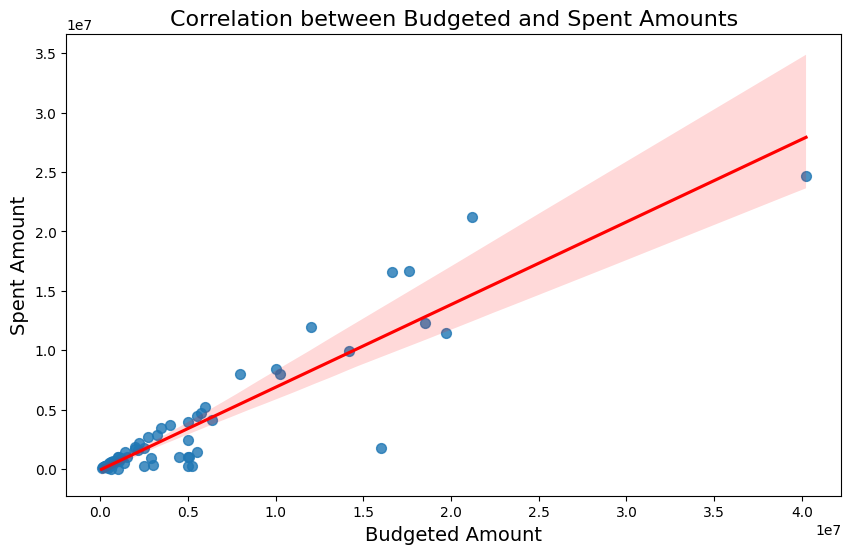

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the relationship between Budgeted and Spent amounts
plt.figure(figsize=(10,6))
sns.regplot(x=merged_df['Amount_Budgeted'].astype(float), y=merged_df['Amount_Spent'].astype(float), scatter_kws={"s": 50}, line_kws={"color": "red"})

# Add labels and title
plt.title('Correlation between Budgeted and Spent Amounts', fontsize=16)
plt.xlabel('Budgeted Amount', fontsize=14)
plt.ylabel('Spent Amount', fontsize=14)

# Display the plot
plt.show()

## **Program Efficiency: Evaluating the effectiveness of programs in utilizing their allocated budgets.**

In [21]:
df.head()

,_id,Investment Focus,Program Type,Program,Amount,Amount Type,Date Allocated,As of Date,Year Allocated
0,1,City Operations,City Operations,"Administrative Oversight, Compliance & Outreac...",2485984.00,Budgeted Amount,2021-06-08T00:00:00,2024-08-31T00:00:00,2021
1,2,City Operations,City Operations,"Administrative Oversight, Compliance & Outreac...",1779217.92,Actual Spend Amount,2021-06-08T00:00:00,2024-08-31T00:00:00,2021
2,3,Community Investment,Affordable Housing and Homelessness,Affordable Housing Program,16000000.00,Budgeted Amount,2022-06-07T00:00:00,2024-08-31T00:00:00,2022
3,4,Community Investment,Affordable Housing and Homelessness,Affordable Housing Program,1812798.50,Actual Spend Amount,2022-06-07T00:00:00,2024-08-31T00:00:00,2022
4,5,Community Investment,Neighborhood Sustainability,After-School Grant for Phoenix Schools,601463.36,Actual Spend Amount,2021-06-08T00:00:00,2024-08-31T00:00:00,2021


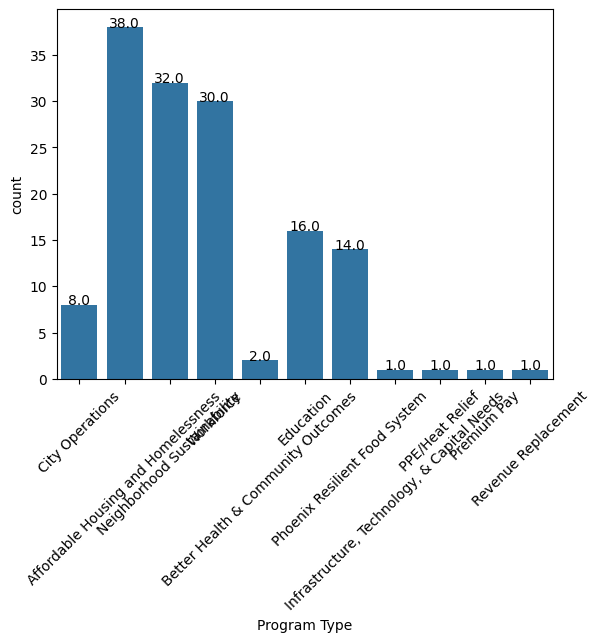

In [22]:
# Is the dataset balanced?
ax = sns.countplot(data=df, x='Program Type')
plt.tick_params(axis='x', rotation=45)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline')

plt.show()

In [23]:
# create pivoted table for the Actual amount and Budgted amount
pivot_data=df.pivot_table(index='Program Type', columns='Amount Type', values='Amount', aggfunc='sum')
#pivot_data = df.groupby(['Program Type', 'Amount Type'])['Amount'].sum().unstack()

In [24]:
# create a new colums for efficiency in the pivot_data df
pivot_data['Effecincy']=pivot_data['Actual Spend Amount']/pivot_data['Budgeted Amount']
pivot_data

Amount Type,Actual Spend Amount,Budgeted Amount,Effecincy
Program Type,,,
Affordable Housing and Homelessness,88892981.90,146725599.27,0.61
Better Health & Community Outcomes,16614643.79,16614643.79,1.00
City Operations,22977987.25,88357957.33,0.26
Education,13454897.28,20206874.00,0.67
"Infrastructure, Technology, & Capital Needs",11534376.69,NaN,NaN
Neighborhood Sustainability,27898973.85,47702896.61,0.58
PPE/Heat Relief,599954.00,NaN,NaN
Phoenix Resilient Food System,12116972.37,14158411.40,0.86
Premium Pay,21073250.00,NaN,NaN


In [25]:
# check for missing value
pivot_data.isnull().sum()

,0
Amount Type,
Actual Spend Amount,0
Budgeted Amount,4
Effecincy,4


In [26]:
# repalce the missing value with mean
pivot_data['Budgeted Amount'].fillna(pivot_data['Budgeted Amount'].mean(), inplace=True)
pivot_data['Effecincy'].fillna(pivot_data['Effecincy'].mean(), inplace=True)
pivot_data.isnull().sum()
pivot_data

<ipython-input-26-884f25a279b4>:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



<ipython-input-26-884f25a279b4>:3: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[

Amount Type,Actual Spend Amount,Budgeted Amount,Effecincy
Program Type,,,
Affordable Housing and Homelessness,88892981.90,146725599.27,0.61
Better Health & Community Outcomes,16614643.79,16614643.79,1.00
City Operations,22977987.25,88357957.33,0.26
Education,13454897.28,20206874.00,0.67
"Infrastructure, Technology, & Capital Needs",11534376.69,55217619.80,0.67
Neighborhood Sustainability,27898973.85,47702896.61,0.58
PPE/Heat Relief,599954.00,55217619.80,0.67
Phoenix Resilient Food System,12116972.37,14158411.40,0.86
Premium Pay,21073250.00,55217619.80,0.67


In [27]:
# now use the linear regression model to determine how much effective the model is

# select the target and feature
X=pivot_data.drop('Effecincy', axis=1)
y=pivot_data['Effecincy']

X_train, X_test, y_train, Y_test=train_test_split(X, y, test_size=0.3, random_state=42)

import statsmodels.api as sm
X = sm.add_constant(X)

reg = sm.OLS(y, X).fit()
reg.summary()

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning:

kurtosistest only valid for n>=20 ... continuing anyway, n=11



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Effecincy   R-squared:                       0.552
Model:                            OLS   Adj. R-squared:                  0.440
Method:                 Least Squares   F-statistic:                     4.926
Date:                Fri, 11 Oct 2024   Prob (F-statistic):             0.0403
Time:                        23:11:19   Log-Likelihood:                 8.1538
No. Observations:                  11   AIC:                            -10.31
Df Residuals:                       8   BIC:                            -9.114
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.8435      0.076     11.140      0.000       0.669       1.018
Actual Spend Amount  5.965e-09   3.05e-09      1.956      0.086   -1.07e-09     1.3e-08
Budgeted Amount       -5.8e-09   1.91e-09     -3.037      0.016   -1.02e-08    -1.4e-09
==============================================================================
Omnibus:                        1.058   Durbin-Watson:                   2.369
Prob(Omnibus):                  0.589   Jarque-Bera (JB):                0.827
Skew:                          -0.434   Prob(JB):                        0.661
Kurtosis:                       1.975   Cond. No.                     1.35e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.35e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [28]:
# #Now lets plot the line
def make_scatter(pivot_data, x_var, y_var):
  fig = px.scatter(pivot_data,x=x_var, y=y_var, trendline="ols")
  fig.show()

In [29]:
make_scatter(pivot_data, 'Actual Spend Amount', 'Budgeted Amount')

In [30]:
make_scatter(pivot_data, 'Budgeted Amount', 'Effecincy')

In [31]:
make_scatter(pivot_data, 'Actual Spend Amount', 'Effecincy')

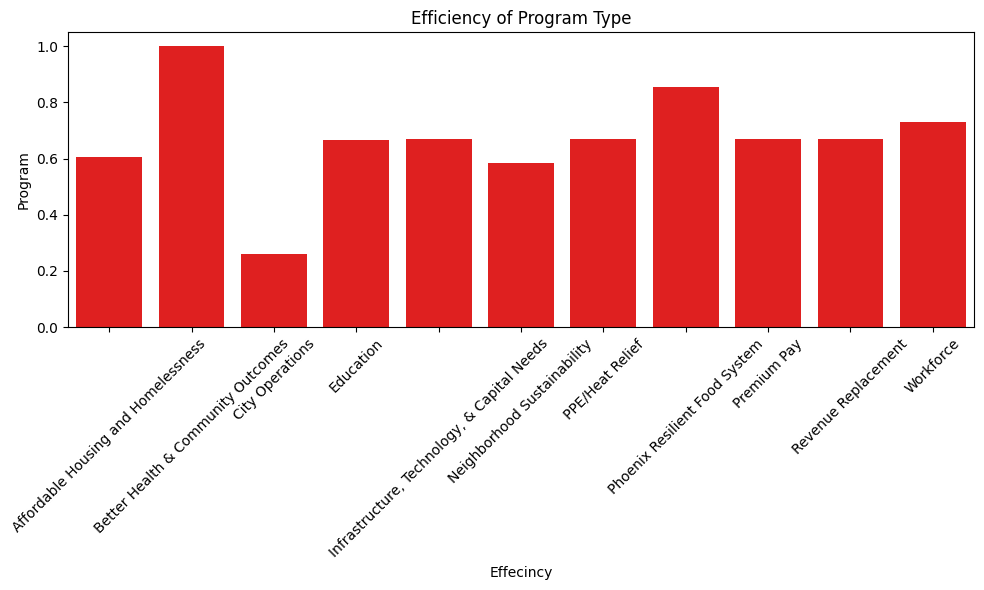

In [32]:
# Plot the efficiency of program type
#pivot_data = pivot_data.sort_values(by='Effecincy', ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(data=pivot_data, x='Program Type', y='Effecincy', color='red')
plt.title('Efficiency of Program Type')
plt.xlabel('Effecincy')
plt.ylabel('Program')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# scatter plot
# plt.figure(figsize=(10,6))
# sns.scatterplot(data=pivot_data, x='Program Type', y='Effecincy',color='red')
# plt.title('Efficiency of Program Type')
# plt.xlabel('Effecincy')
# plt.ylabel('Program')
# plt.xticks(rotation=45)